# Sobre NaN, zeros nos Arrays

In [154]:
import numpy as np

## Ausência de números

In [155]:
# NaN → Not a Number
x = np.array([1, 2, np.nan, 3, np.nan, 5])

In [156]:
x

array([ 1.,  2., nan,  3., nan,  5.])

In [157]:
x*2

array([ 2.,  4., nan,  6., nan, 10.])

In [158]:
x2 = np.array([1, 2, 'nan', 3, np.nan, 5])

In [159]:
x2

array(['1', '2', 'nan', '3', 'nan', '5'], dtype='<U32')

In [160]:
# x2*2

# #UFuncTypeError: ufunc 'multiply' did not contain a loop with
# signature matching types (dtype('<U32'), dtype('int32')) -> None

In [161]:
x3 = [1, 2, 'nan', 3, np.nan, 5]

In [162]:
x3

[1, 2, 'nan', 3, nan, 5]

## Removendo NaN de Arrays

In [163]:
x4 = np.array([1, 2, np.nan, 3, np.nan, 5, np.nan, 2,
              1, 5, 8, 9, np.nan, 11, 3, 2, 7, np.nan])

In [164]:
lista = []
for i in x4:
    if np.isnan(i):
        print('---> NaN')
    else:
        lista.append(i)
    print(i)

1.0
2.0
---> NaN
nan
3.0
---> NaN
nan
5.0
---> NaN
nan
2.0
1.0
5.0
8.0
9.0
---> NaN
nan
11.0
3.0
2.0
7.0
---> NaN
nan


In [165]:
lista

[1.0, 2.0, 3.0, 5.0, 2.0, 1.0, 5.0, 8.0, 9.0, 11.0, 3.0, 2.0, 7.0]

In [166]:
x5 = np.array(lista)

In [167]:
x5

array([ 1.,  2.,  3.,  5.,  2.,  1.,  5.,  8.,  9., 11.,  3.,  2.,  7.])

In [168]:
x6 = x4[~np.isnan(x4)]

In [169]:
x6

array([ 1.,  2.,  3.,  5.,  2.,  1.,  5.,  8.,  9., 11.,  3.,  2.,  7.])

## Operações com vetores em NaN

In [170]:
x4

array([ 1.,  2., nan,  3., nan,  5., nan,  2.,  1.,  5.,  8.,  9., nan,
       11.,  3.,  2.,  7., nan])

In [171]:
x4.sum()

nan

In [172]:
x4.mean()

nan

In [173]:
x4.std()

nan

## Remover NaN para poder exeutar as operações

In [174]:
x4[~np.isnan(x4)].sum()

59.0

In [175]:
x4[~np.isnan(x4)].mean()

4.538461538461538

In [176]:
x4[~np.isnan(x4)].std()

3.1529079279875685

## Removendo elementos Nulos

In [177]:
y = np.array([1, 0, np.nan, 3, np.nan, 5, np.nan, 2,
             1, 0, 8, 0, np.nan, 0, 3, 0, 7, np.nan])

In [178]:
y.nonzero()

(array([ 0,  2,  3,  4,  5,  6,  7,  8, 10, 12, 14, 16, 17], dtype=int64),)

In [179]:
type(y.nonzero())

tuple

In [180]:
ind = y.nonzero()

In [181]:
y[ind]

array([ 1., nan,  3., nan,  5., nan,  2.,  1.,  8., nan,  3.,  7., nan])

In [182]:
y[y.nonzero()]

array([ 1., nan,  3., nan,  5., nan,  2.,  1.,  8., nan,  3.,  7., nan])

In [183]:
# y[ind][~np.isnan(y)]

# IndexError: boolean index did not match indexed array along dimension 0;
# dimension is 13 but corresponding boolean dimension is 18

## Solução  do Erro de Indexação

In [184]:
y[ind]

array([ 1., nan,  3., nan,  5., nan,  2.,  1.,  8., nan,  3.,  7., nan])

In [185]:
y

array([ 1.,  0., nan,  3., nan,  5., nan,  2.,  1.,  0.,  8.,  0., nan,
        0.,  3.,  0.,  7., nan])

In [186]:
np.isnan(y)

array([False, False,  True, False,  True, False,  True, False, False,
       False, False, False,  True, False, False, False, False,  True])

In [187]:
np.isnan(y[ind])

array([False,  True, False,  True, False,  True, False, False, False,
        True, False, False,  True])

In [188]:
y[ind][~np.isnan(y[ind])]

array([1., 3., 5., 2., 1., 8., 3., 7.])

In [189]:
y_sem_zeros = y[y.nonzero()]

In [190]:
y_sem_zeros

array([ 1., nan,  3., nan,  5., nan,  2.,  1.,  8., nan,  3.,  7., nan])

In [191]:
y_sem_zeros_e_nan = y_sem_zeros[~np.isnan(y_sem_zeros)]

In [192]:
y_sem_zeros_e_nan

array([1., 3., 5., 2., 1., 8., 3., 7.])

# Modicando elementos de um Array

## Funções fill, flat, .clip()

In [193]:
h = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4, 5])

In [194]:
h

array([-4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

In [195]:
h.fill(9)

In [196]:
h

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

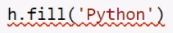

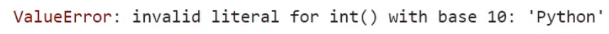

In [197]:
h.flat = 88

In [198]:
h

array([88, 88, 88, 88, 88, 88, 88, 88, 88, 88])

### Função .Clip()

In [199]:
h = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4, 5])

In [200]:
h

array([-4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

In [201]:
h.clip(-2, 2)

array([-2, -2, -2, -1,  0,  1,  2,  2,  2,  2])

In [202]:
h.clip(-3, 4)

array([-3, -3, -2, -1,  0,  1,  2,  3,  4,  4])

# Como ordenar elementos de um array

In [203]:
w = np.array([6, 2, -4, 8, 1, -3, 1, 0, -2, 6, -
             1, 0, 1, -2, 3, -1, 4, 3, 0, 1, 5])

In [204]:
w

array([ 6,  2, -4,  8,  1, -3,  1,  0, -2,  6, -1,  0,  1, -2,  3, -1,  4,
        3,  0,  1,  5])

In [205]:
w.sort()

In [206]:
w

array([-4, -3, -2, -2, -1, -1,  0,  0,  0,  1,  1,  1,  1,  2,  3,  3,  4,
        5,  6,  6,  8])

In [207]:
w = sorted(w, reverse=True)

In [208]:
w

[8, 6, 6, 5, 4, 3, 3, 2, 1, 1, 1, 1, 0, 0, 0, -1, -1, -2, -2, -3, -4]

In [209]:
v = [4, 2, 8, 1, 2, 9, 2]

In [210]:
v

[4, 2, 8, 1, 2, 9, 2]

In [211]:
v.sort()

In [212]:
v

[1, 2, 2, 2, 4, 8, 9]

# Arrays especiais

#### Zeros, Empty, Ones

In [213]:
u = np.zeros(20)

In [214]:
u

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [215]:
v = np.empty(20)

In [216]:
v

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [217]:
type(u)

numpy.ndarray

In [218]:
type(v)

numpy.ndarray

In [220]:
u.dtype

dtype('float64')

In [221]:
v.dtype

dtype('float64')

In [222]:
z = np.ones(20)

In [223]:
z

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [224]:
# Validação da igualdade
u == v

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

### Métodos .repeat() e .full()

In [225]:
h = np.array([0])

In [226]:
h

array([0])

In [227]:
h.repeat(20)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [228]:
h2 = np.array([1])

In [229]:
h2

array([1])

In [230]:
h2.repeat(3)

array([1, 1, 1])

In [231]:
h3 = np.array([3.14])
h3.repeat(7)

array([3.14, 3.14, 3.14, 3.14, 3.14, 3.14, 3.14])

In [232]:
h8 = np.ones(7)

In [233]:
h8*3.14

array([3.14, 3.14, 3.14, 3.14, 3.14, 3.14, 3.14])

### Uso do método .full()

In [234]:
q = np.full((1, 9), 7)

In [235]:
q

array([[7, 7, 7, 7, 7, 7, 7, 7, 7]])

In [236]:
q2 = np.ones(9)*7

In [237]:
q2

array([7., 7., 7., 7., 7., 7., 7., 7., 7.])

In [238]:
q

array([[7, 7, 7, 7, 7, 7, 7, 7, 7]])

In [239]:
q2.dtype

dtype('float64')

In [240]:
q.dtype

dtype('int32')

In [241]:
q3 = np.full((1, 9), 7.)

In [242]:
q3

array([[7., 7., 7., 7., 7., 7., 7., 7., 7.]])

In [243]:
q3.dtype

dtype('float64')

In [244]:
q3.shape

(1, 9)

In [249]:
q2.shape

(9,)

In [250]:
q4 = np.full((2, 9), 7.0)

In [251]:
q4

array([[7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7.]])

### Vetor arange()


In [252]:
a = np.arange(50, 101)

In [253]:
a

array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [254]:
a2 = np.arange(50, 101, 2)

In [255]:
a2

array([ 50,  52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,
        76,  78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [256]:
a3 = np.arange(50, 101, 4)

In [257]:
a3

array([50, 54, 58, 62, 66, 70, 74, 78, 82, 86, 90, 94, 98])

In [258]:
(a3 + 1)*2/5

array([20.4, 22. , 23.6, 25.2, 26.8, 28.4, 30. , 31.6, 33.2, 34.8, 36.4,
       38. , 39.6])

# Array-List-Array

In [260]:
r = np.array([0.1, 0.5, -0.4, 0.2, 0.7, -0.2])

In [261]:
r

array([ 0.1,  0.5, -0.4,  0.2,  0.7, -0.2])

In [262]:
list(r)

[0.1, 0.5, -0.4, 0.2, 0.7, -0.2]

In [263]:
r.tolist()

[0.1, 0.5, -0.4, 0.2, 0.7, -0.2]

In [264]:
r

array([ 0.1,  0.5, -0.4,  0.2,  0.7, -0.2])

In [265]:
# Para mudear a natureza di vetor "r"
r = r.tolist()

In [266]:
r

[0.1, 0.5, -0.4, 0.2, 0.7, -0.2]

In [268]:
np.array(r)

array([ 0.1,  0.5, -0.4,  0.2,  0.7, -0.2])

In [269]:
np.asarray(r)

array([ 0.1,  0.5, -0.4,  0.2,  0.7, -0.2])

In [270]:
f = np.ones((3, 4))

In [272]:
f1 = f.tolist()

In [273]:
np.asarray(f1)

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])